In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (50,50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [3]:
def load_data():
    datasets = ['/content/drive/MyDrive/Crop/']   #path where your dataset is stored
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):#subfolder
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(dataset,folder)):
                if file[-3:] in {'jpg','png'}:
                    img_path = os.path.join(os.path.join(dataset,folder),file)
                    
                    image = Image.open(img_path)
                    image = image.convert('RGB')
                    image = image.resize(IMAGE_SIZE)
                    
                    images.append(image)
                    labels.append(label)

        images = np.array([np.array(image) for image in images])
        labels = np.array([np.array(label) for label in labels])    
        
    return images,labels

In [4]:
(X,y) = load_data()

Loading /content/drive/MyDrive/Crop/


In [5]:
print(X.shape)
print(y.shape)

(2406, 50, 50, 3)
(2406,)


In [6]:
type(X)

numpy.ndarray

In [7]:
y

array([ 8,  8,  8, ..., 15, 15, 15])

Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training, 20% testing
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42) #60% training, 20% validation, 20% testing

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1443, 50, 50, 3)
(1443,)
(481, 50, 50, 3)
(481,)
(482, 50, 50, 3)
(482,)


In [10]:
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

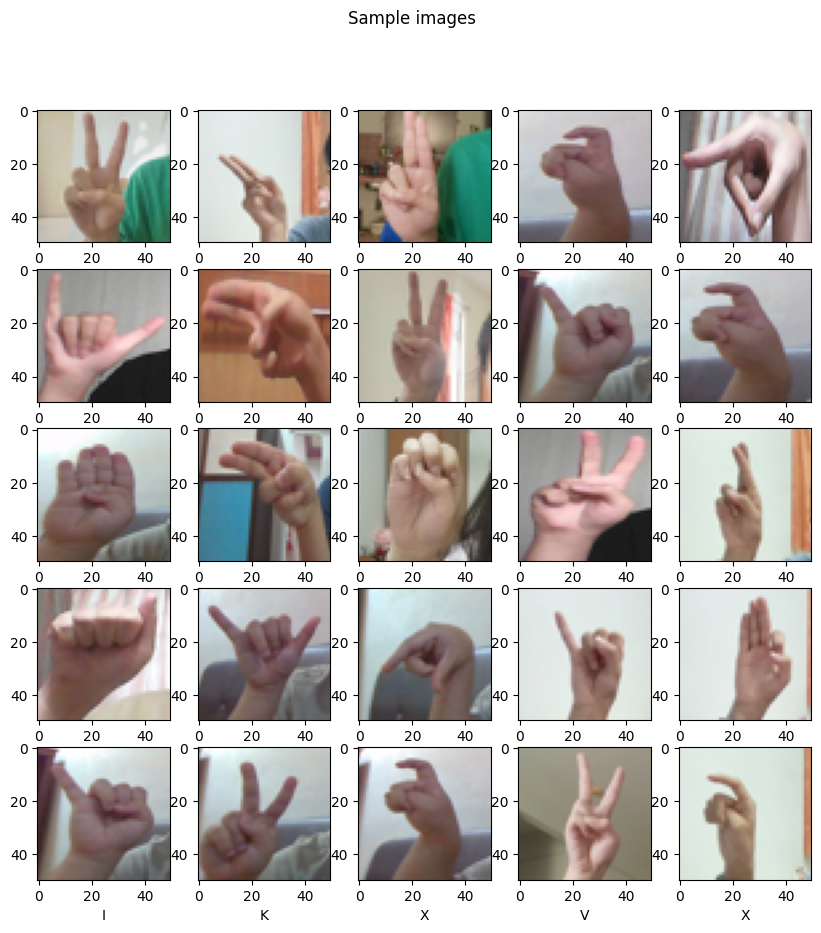

In [11]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Sample images')
for i in range(25):
    plt.subplot(5,5,i+1)
#   plt.xticks =([])
#   plt.yticks = []
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [12]:
x_train = x_train.reshape(-1,50*50*3)
x_valid = x_valid.reshape(-1,50*50*3)
x_test = x_test.reshape(-1,50*50*3)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1443, 7500)
(1443,)
(481, 7500)
(481,)
(482, 7500)
(482,)


PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500) 
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)
x_test = pca.transform(x_test)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(1443, 500)
(1443,)
(481, 500)
(481,)
(482, 500)
(482,)


Logistic Regression

In [16]:
#Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

parameters = {
    'penalty':['l1','l2','elasticnet'],
    'solver':['lbfgs','newton-cg','liblinear'],
    'max_iter': [1000, 1500, 2000, 2500],
}

clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(x_train, y_train)

print(clf.best_params_)

train_pred = clf.predict(x_train)
print("Training accuracy: ",accuracy_score(y_train,train_pred))

test_pred = clf.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,test_pred))

valid_pred = clf.predict(x_valid)
print("Valid accuracy:",accuracy_score(y_valid,valid_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy:  1.0
Testing accuracy:  0.7987551867219918
Valid accuracy: 0.7713097713097713


Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,labels=clf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       0.88      0.70      0.78        20
           2       0.94      0.89      0.92        19
           3       0.76      0.76      0.76        21
           4       0.95      0.77      0.85        26
           5       0.83      0.80      0.82        25
           6       0.88      0.71      0.79        31
           7       0.78      0.72      0.75        29
           8       0.79      0.79      0.79        19
           9       0.94      0.71      0.81        24
          10       0.96      0.96      0.96        27
          11       0.76      0.89      0.82        18
          12       0.95      0.75      0.84        28
          13       0.72      0.88      0.79        24
          14       0.83      0.66      0.73        29
          15       0.56      0.87      0.68        23
          16       0.59      0.79      0.68        24
          17       0.82    

Confusion Matrix

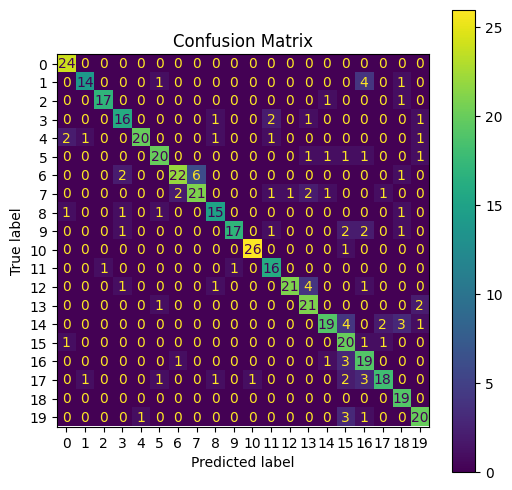

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,test_pred,labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

Training and Validation Accuracy

Training Accuracy: 1.0
Validation Accuracy: 0.7713097713097713


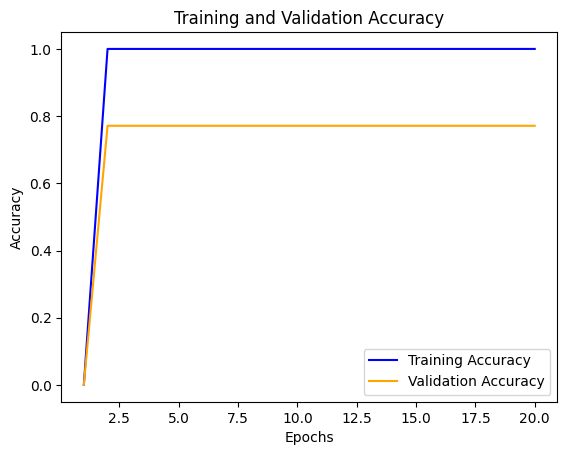

In [24]:
train_accuracy = accuracy_score(y_train,train_pred)
val_accuracy = accuracy_score(y_valid,valid_pred)

# Display the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

epochs = np.arange(1, 21)

train_accuracy_values = [0] + [train_accuracy] * (len(epochs) - 1)
val_accuracy_values = [0] + [val_accuracy] * (len(epochs) - 1)

plt.plot(epochs, train_accuracy_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'orange', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, x_train, y_train, cv=5)  # Use 5-fold cross-validation

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy Scores: [0.7716263  0.77508651 0.76470588 0.81597222 0.80208333]
Average Accuracy: 0.7858948481353326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


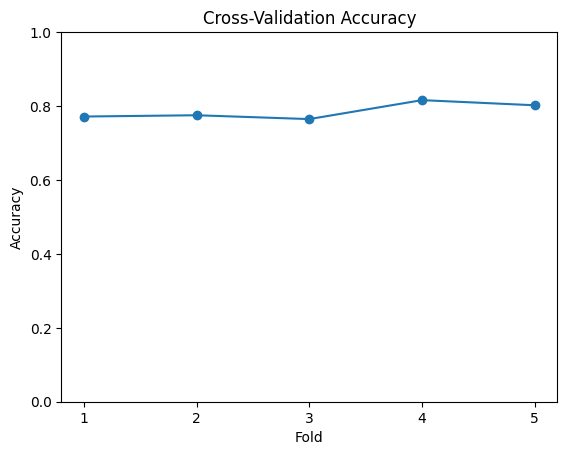

In [27]:
fold_labels = np.arange(1, len(cv_scores) + 1)

plt.plot(fold_labels, cv_scores, marker='o')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(fold_labels)
plt.show()
